In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
SampleData = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5,random_state=40)

In [3]:
X = SampleData[0]
y=SampleData[1]

In [4]:
ClusterData=pd.DataFrame(list(zip(X[:,0],X[:,1],y)), columns=['X1','X2','ClusterID'])
print(ClusterData.head())

         X1        X2  ClusterID
0  6.424707 -5.383260          1
1 -3.514357 -8.923733          0
2  4.675701 -1.826950          1
3  6.981109 -5.590862          1
4 -0.883079 -9.152122          0


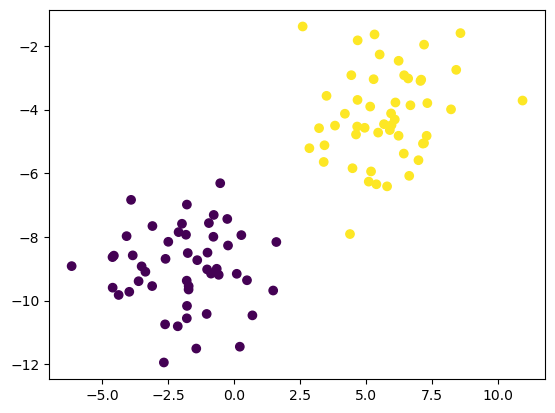

In [5]:
%matplotlib inline
plt.scatter(ClusterData['X1'], ClusterData['X2'], c=ClusterData['ClusterID'])

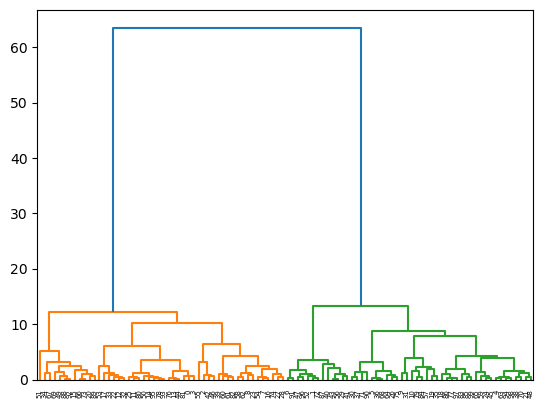

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

In [8]:
ClusterData['PredictedClusterID']=hc.fit_predict(X)
print(ClusterData.head())

         X1        X2  ClusterID  PredictedClusterID
0  6.424707 -5.383260          1                   1
1 -3.514357 -8.923733          0                   0
2  4.675701 -1.826950          1                   1
3  6.981109 -5.590862          1                   1
4 -0.883079 -9.152122          0                   0


C:\Users\reddy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


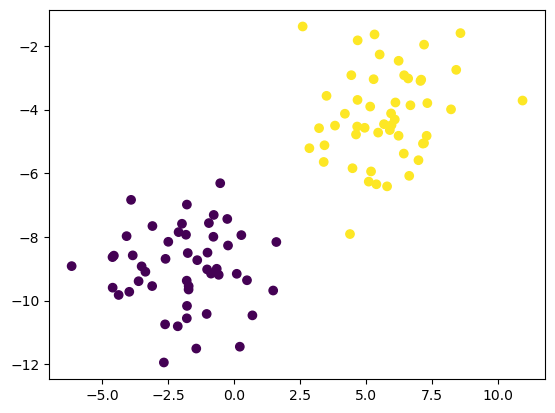

In [9]:
plt.scatter(ClusterData['X1'], ClusterData['X2'], c=ClusterData['PredictedClusterID'])